<a href="https://colab.research.google.com/github/isratmunia/Machine_Learning_Deep_Learning_Codes/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab.files import upload
file = upload ()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import confusion_matrix

In [ ]:
#load data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#The features of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<ipython-input-10-d2c21b80e61d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot (x = data["DEATH_EVENT"], palette = cols) #ploting the death event occurs or not


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

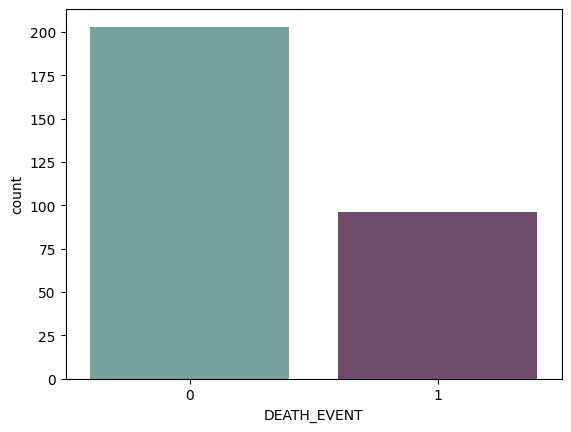

In [ ]:
#Check is our data imbalanced or not
cols = ["#6daa9f", "#774571"]
sns.countplot (x = data["DEATH_EVENT"], palette = cols) #ploting the death event occurs or not

In [ ]:
# Drop death event and consider others features
X = data.drop(["DEATH_EVENT"], axis = 1)
Y = data["DEATH_EVENT"]

X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [ ]:
# Transform data in standard form
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df = s_scaler.fit_transform(X)

X_df = pd.DataFrame(X_df, columns = col_names) # convert 2d array to dataframe df
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [ ]:
#Split train test data
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y, test_size = 0.25, random_state = 7) #training data 75% and test 25%

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 30,
    restore_best_weights = True
)

#Initialize the model type
model = Sequential()

#layers
#input Layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

#Hidden Layers1
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25)) #25% neurons are ignored during traing

#Hidden Layer2
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5)) #50% neurons are ignored during traing

#Output Layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Complie ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#Train the ANN
history = model.fit(X_train, Y_train, batch_size = 31, epochs = 500, callbacks = [early_stopping], validation_split = 0.2)

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6016 - loss: 0.6930 - val_accuracy: 0.6667 - val_loss: 0.6922
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6755 - loss: 0.6920 - val_accuracy: 0.6667 - val_loss: 0.6913
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6359 - loss: 0.6915 - val_accuracy: 0.6667 - val_loss: 0.6904
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6453 - loss: 0.6906 - val_accuracy: 0.6667 - val_loss: 0.6895
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6176 - loss: 0.6903 - val_accuracy: 0.6667 - val_loss: 0.6885
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6400 - loss: 0.6889 - val_accuracy: 0.6667 - val_loss: 0.6873
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6558 - loss: 0.6874 - val_accuracy: 0.6667 - val_loss: 0.6859
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6751 - loss: 0.6851 - val_accuracy: 0.6667 - val_loss:

In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100)) #Print in percentage


val_accuracy: 68.47%


In [ ]:
#Predicting the test set
Y_pred = model.predict(X_test) # predict with test dataset
Y_pred = (Y_pred > 0.5) #make predicted value to 0 or 1
Y_pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
Y_test

,DEATH_EVENT
268,0
240,0
278,0
176,0
202,0
...,...
24,1
62,0
249,0
90,0


[[57  0]
 [18  0]]


<Axes: >

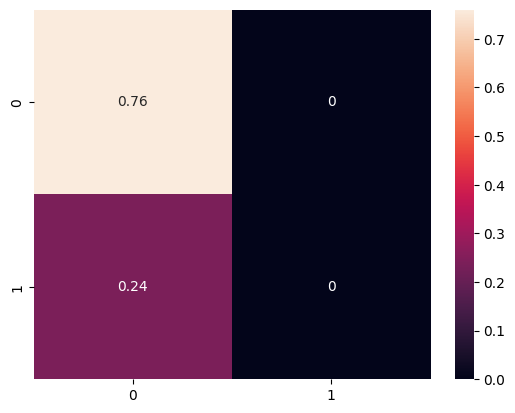

In [ ]:
#Confusion matrix
cf_matrix = confusion_matrix(Y_test, Y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True) # show confusion matrix with accuracy rate